# Demonstration: Intro to Goodness of Fit

First we have our standard header with common import statements, and a statement to make plots look nice.

In [1]:
# standard import statements
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as opt
import classlib4334

# jupyter-specific display instructions
%config InlineBackend.figure_format = 'retina'

# my personal defaults
mpl.rcParams['figure.figsize'] = (5.5, 3.5)
mpl.rcParams['font.size'] = 9
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 5

In [2]:
def linear_model(x, a, b):
    return a + b*x

## Example 1

In [3]:
# read data from excel file
excel_file = 'data/demo-residual-analysis-1.xlsx'
mydata = pd.read_excel(excel_file)

# extract into numpy arrays
x = np.array(mydata['x'])
y = np.array(mydata['y'])

# fit to a line
pfit, perr = classlib4334.fit_and_plot(linear_model, x, y, residual=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/demo-residual-analysis-1.xlsx'

This result is typical of a "very good fit."  It exhibits, in decreasing order of importance:

1. the model (red curve) lines up neatly with the data everywhere
2. the residual has no observable structure / coherence
3. the residual has a small magnitude (below 5%)
4. the model has a high value of $R^2$



# Example 2

Now let's examine the complete opposite case.  For the rest of the examples, we'll speed things up a bit to focus on ideas instead of code.

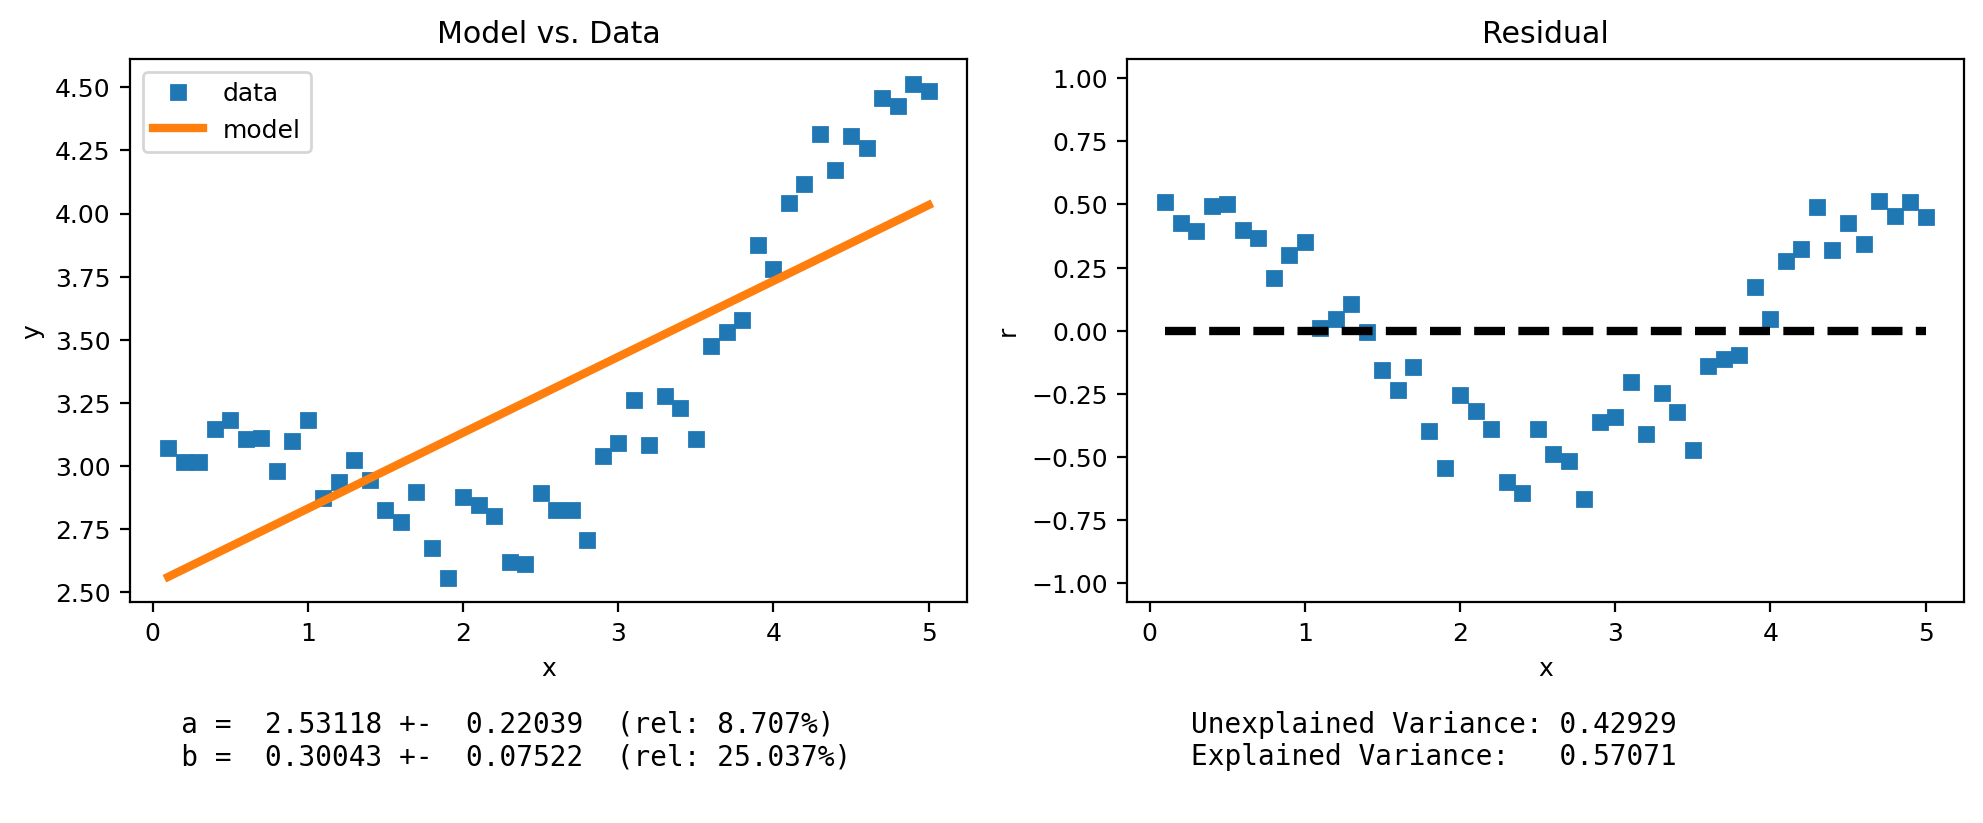

In [5]:
# read data from excel file
excel_file = 'data/demo-residual-analysis-2.xlsx'
mydata = pd.read_excel(excel_file)

# extract into numpy arrays
x = np.array(mydata['x'])
y = np.array(mydata['y'])

# fit to a line
pfit, perr = classlib4334.fit_and_plot(linear_model, x, y, residual=True)


This model exhbits none of the four qualities described above.  In particular, the residual exhibits both

* high coherence 
* large magnitude

We should evaluate this model as being a poor fit to the data, in need of improvement (which we will cover in later units).

## Examples 3 and 4

Next we will look at two data/model pairs that live somewhere in between the two extremes just considered.

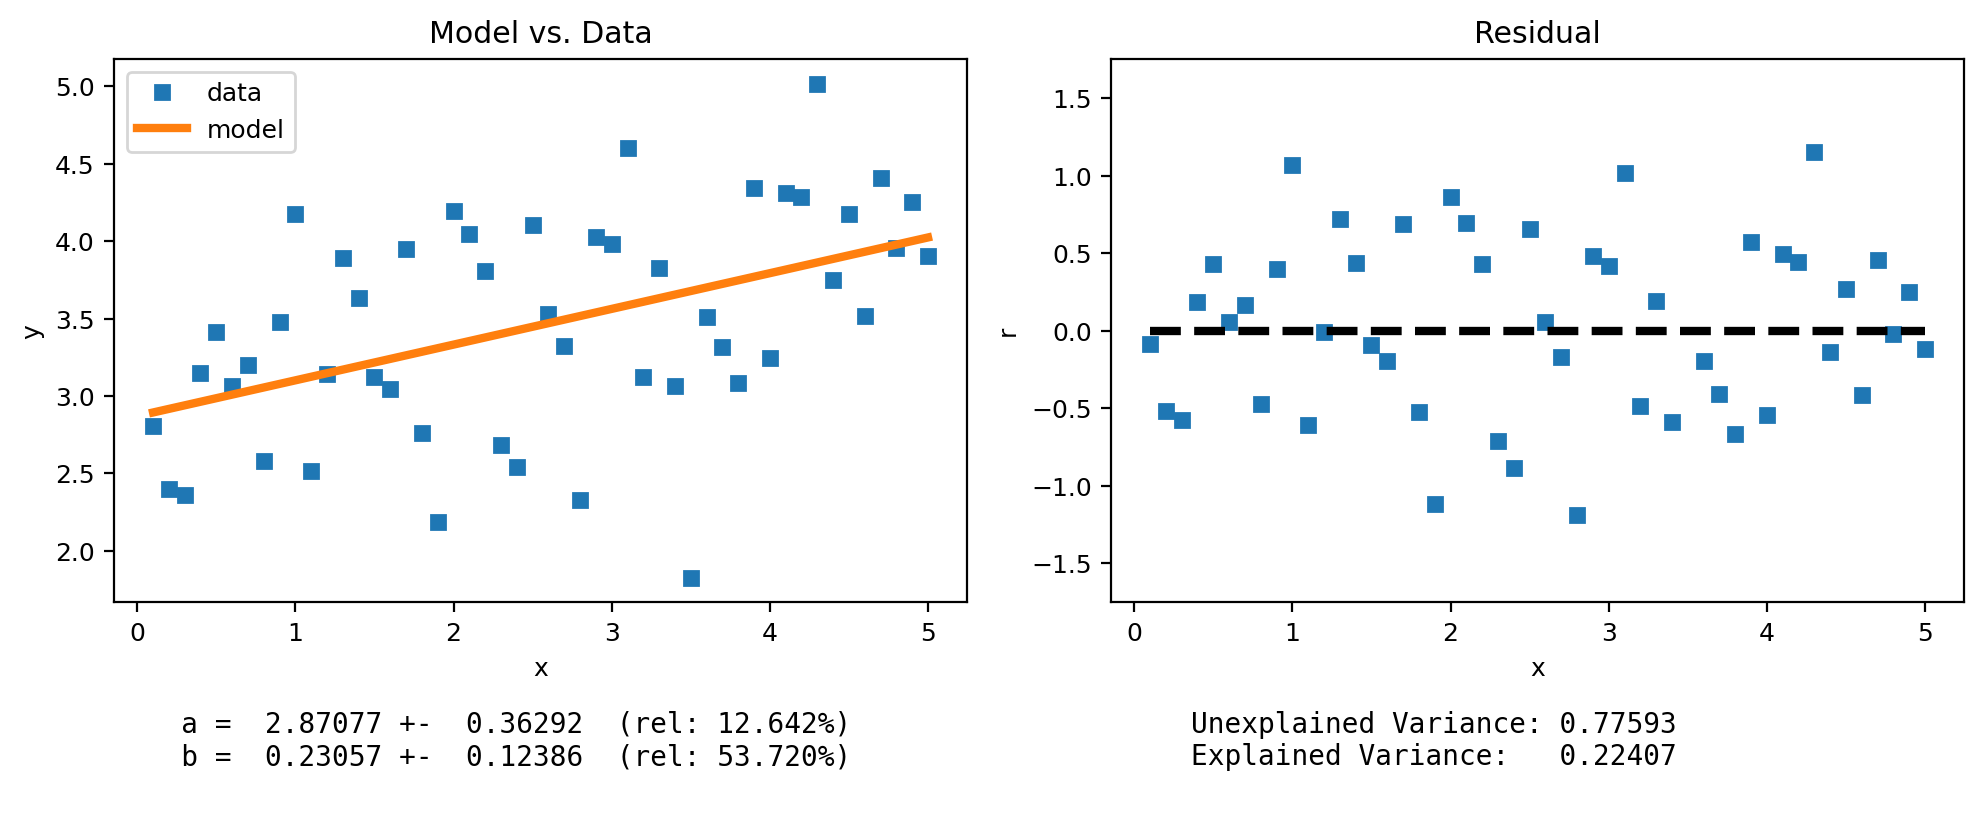

In [6]:
# read data from excel file
excel_file = 'data/demo-residual-analysis-3.xlsx'
mydata = pd.read_excel(excel_file)

# extract into numpy arrays
x = np.array(mydata['x'])
y = np.array(mydata['y'])

# fit to a line
pfit, perr = classlib4334.fit_and_plot(linear_model, x, y, residual=True)

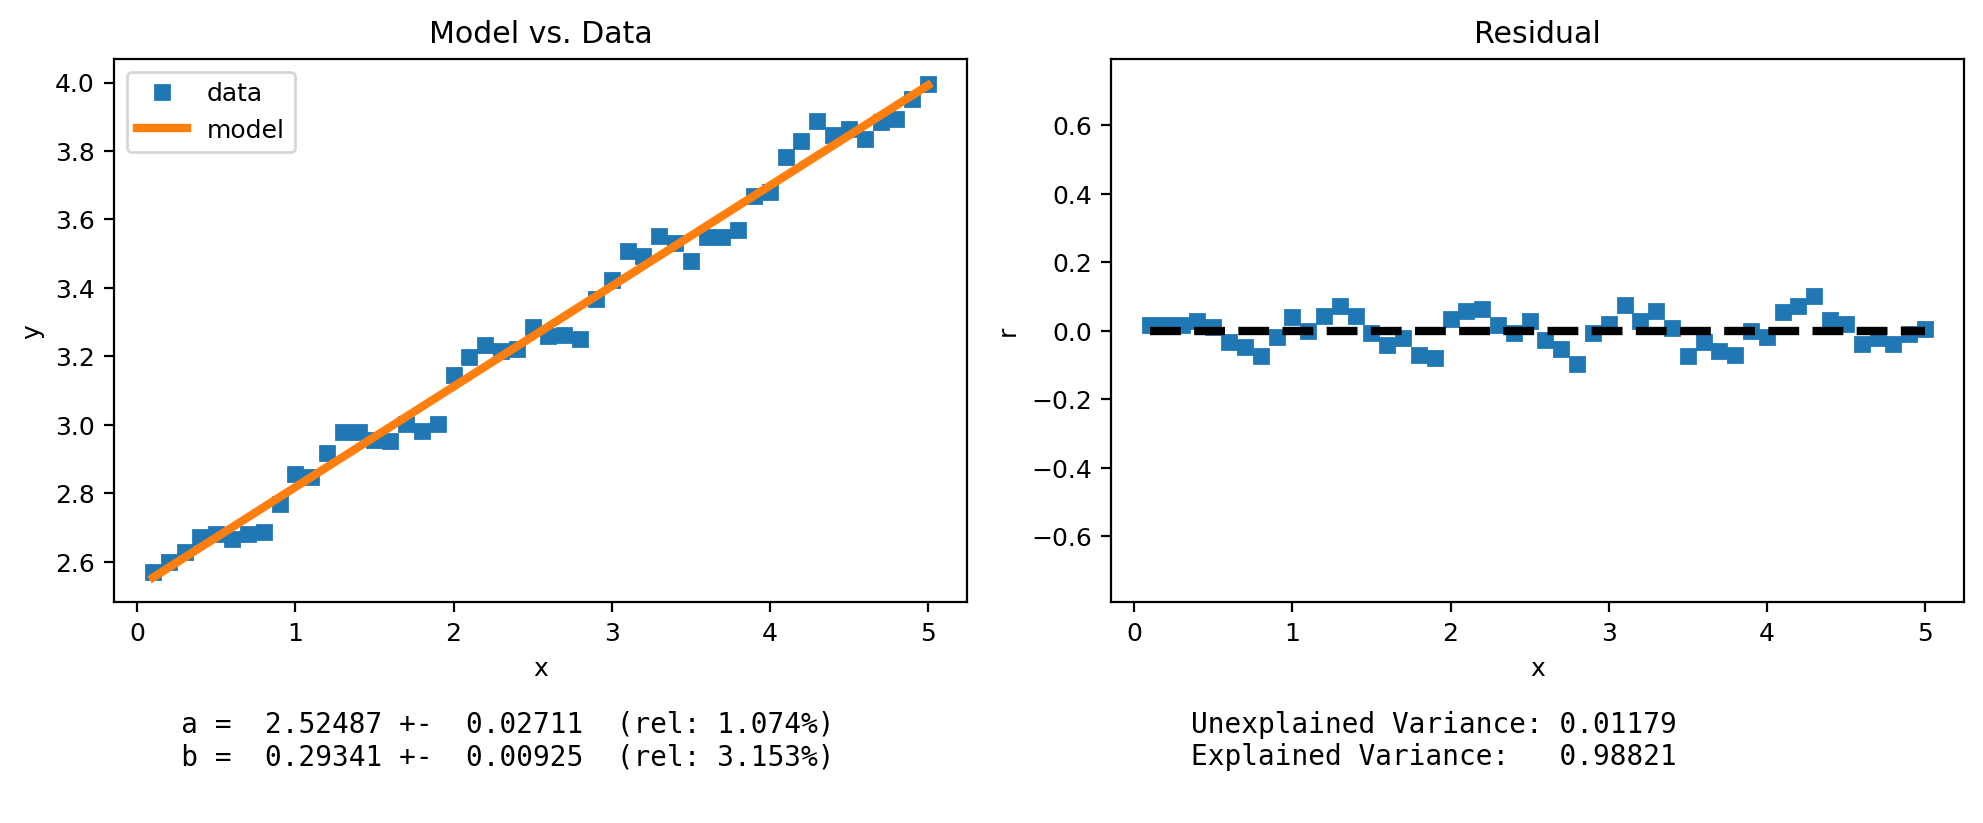

In [7]:
# read data from excel file
excel_file = 'data/demo-residual-analysis-4.xlsx'
mydata = pd.read_excel(excel_file)

# extract into numpy arrays
x = np.array(mydata['x'])
y = np.array(mydata['y'])

# fit to a line
pfit, perr = classlib4334.fit_and_plot(linear_model, x, y, residual=True)


These are a very interesting and contrasting pair of datasets.  The residual in Example 3 has **large magnitude**, but **low coherence**.  In contrast, the residual in Example 4 as **small magnitude**, but **high coherence**.  Either of these results may or may not be problematic, depending on the context.  This is because the residual ***actually*** consists of two distinct components:

* data variation
* model error

**Data Variation** is natural -- potentially random -- deviation of data points from an underlying trend.  It is very common in the social and biological sciences (where data points may refer unique organisms), and less common in the physical sciences (where data points typically refer to repeatable measurements).  It tends to have low coherence.

**Model Error** is exactly what it sounds like -- a failure of a model to account for some important principle governing the data set.  It is common across all branches of science, but is particularly obvious in the physical sciences, where there is less data variation.  When present, this error tends to exhibit high residual coherence.

With this new conceptual vocabulary, we could say that Example 3 appears to exhibit large amounts of sample variation.  But if such variation is random, there may not be much we can do about it, and we may very likely be content to stop with the model we have, even though it explains only 22% of the variation (what we'd probably do next is add *another independent variable* and attempt a *multiple regression*, but we won't cover that in this class).

In contrast, Example 4 appears to exhibit small amounts of both data variation and model error.  In principle, the model error could be reduced with a better model, but because the model error is small, and the $R^2$ value is high, we might -- *in certain contexts* -- decide that the linear model is "good enough," and that time spent chasing down the cause of the model error is better spent on other tasks.  But this is highly context-dependent.
